## Hypothesis
DV2=HabitC=mean(HabitC5,HabitC6,HabitC7)

In [30]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3   4   5   6   7   8 
118  68 145 163  85  60  87  98 

In [43]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncHomeS" "63"      
[1] "IncWD" "98"   
[1] "IncDish" "271"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "26"      


In [44]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 826  60
[1] 627  60


In [71]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
#"Frugal",
"MC",
"EnergyC",
#"Trust",
"ComfNS",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude")

In [72]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "ComfNS"     "ComfNW"     "Educ"      
 [6] "EnergyC"    "Ethnic"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "IncHomeS"   "Income"     "Latitude"   "MC"        
[16] "OwnRent"    "PBC"        "Political"  "SN"         "SqftCate"

[1] "Age"        "Atti"       "ComfNS"     "ComfNW"     "Educ"      
 [6] "EnergyC"    "Ethnic"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "Income"     "Latitude"   "MC"         "OwnRent"   
[16] "PBC"        "Political"  "SN"         "SqftCate"   "SubNorm"

In [73]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [74]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [75]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "MC"         "EnergyC"    "ComfNS"     "ComfNW"    
[16] "Atti"       "PBC"        "SN"         "HabitG"     "HabitC"

In [76]:
data1 [is.na(data1$IncHomeS), ]

IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,Latitude,MC,EnergyC,ComfNS,ComfNW,Atti,PBC,SN,HabitG,HabitC


In [77]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.1     5.0     8.0 


  1   2   3   4   5   6   7   8 
 54  42 120 214  56  59  48  34 


  1   2   3   4   5 
 66 221 144 115  81 

In [78]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "MC"         "EnergyC"    "ComfNS"     "ComfNW"    
[16] "Atti"       "PBC"        "SN"         "HabitG"     "HabitC"

In [79]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [80]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      1.80      11.15       0.50       0.52       1.12       1.21       0.82 
    Ethnic     Income       Educ   Latitude         MC    EnergyC     ComfNS 
      0.38       1.97       1.11       5.06       1.07       1.39       1.45 
    ComfNW       Atti        PBC         SN     HabitG     HabitC 
      1.74       1.10       0.94       1.41       1.17       1.60

In [81]:
hiCor(data2,.4)

,OwnRent,SqftCate,MC,EnergyC,Atti
OwnRent,1.000,0.4810,0.0427,-0.048,-0.011
SqftCate,0.481,1.0000,-0.0067,-0.068,-0.016
MC,0.043,-0.0067,1.0000,0.311,0.423
EnergyC,-0.048,-0.0680,0.3112,1.000,0.567
Atti,-0.011,-0.0161,0.4225,0.567,1.000


In [82]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:22];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:22){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


ERROR: Error in prcomp(data2, retx = F, scale = T)$rotation[, 1:22]: subscript out of bounds


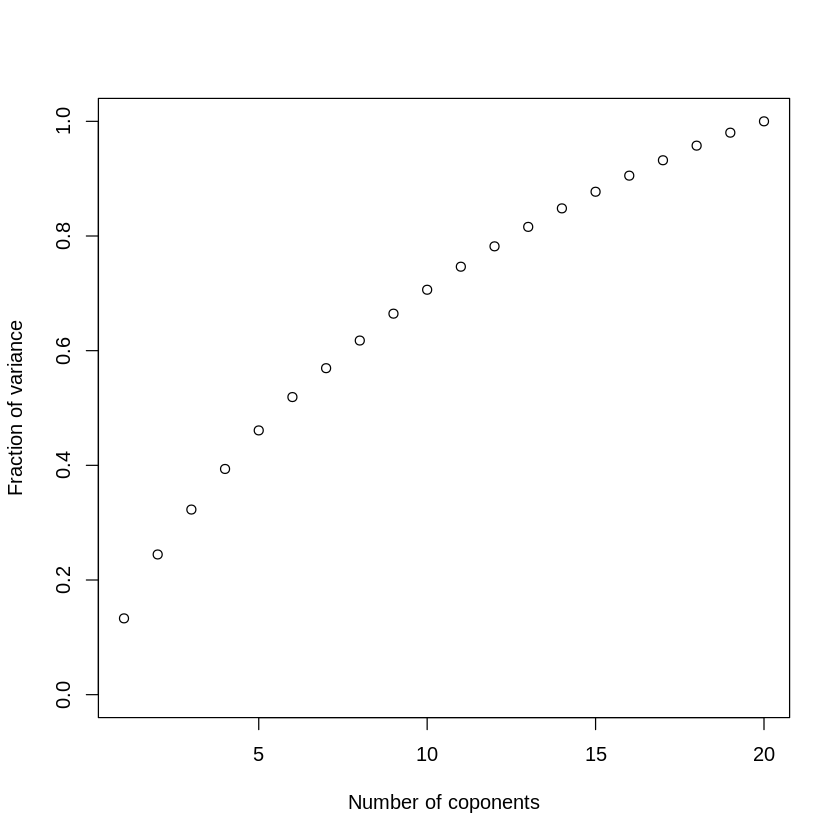

In [83]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [84]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [85]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,16,0.42
EnergyC,13,0.38
SqftCate,5,0.36
OwnRent,4,0.31
HouseholdS,6,0.27
Income,9,0.26
MC,12,0.24
HabitG,19,0.21
HabitC,20,0.21
Age,2,0.20
Educ,10,0.16


In [86]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [87]:
#IndepPred = c('Atti', 'Age', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SN' 'HabitG', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')

In [88]:
fmla <- as.formula(paste("HabitC",paste(IndepPred,collapse="+"),sep="~"));

In [89]:
table(data2[,"HabitC"])


  1 1.5   2 2.5   3 3.5   4 4.5   5 5.5   6 6.5   7 7.5   8 
 20  12  16  23  45  57  74  76  72  43  61  51  71   3   3 

In [90]:
mod = lm(fmla,data=data2)
summary(mod)

Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 9 in model.matrix: no columns are assigned"


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.771 -0.909  0.033  1.014  3.517 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.44024    0.84022    2.90  0.00381 ** 
Atti         0.06055    0.06903    0.88  0.38074    
EnergyC     -0.07022    0.05277   -1.33  0.18381    
SqftCate     0.12832    0.06454    1.99  0.04724 *  
OwnRent     -0.05746    0.13384   -0.43  0.66783    
HouseholdS  -0.11232    0.05552   -2.02  0.04351 *  
Income      -0.01159    0.03400   -0.34  0.73322    
MC           0.03479    0.06183    0.56  0.57385    
HabitG       0.27707    0.05423    5.11  4.3e-07 ***
Age          0.00543    0.00579    0.94  0.34894    
Educ         0.13881    0.05658    2.45  0.01443 *  
PBC          0.17888    0.06618    2.70  0.00707 ** 
Gender       0.24769    0.12474    1.99  0.04752 *  
Political   -0.06555    0.07560   -0.87  0.38621    
ComfNS      -0.26164    0.04163   -6.29  6.2e-10 ***
Ethnic      -

In [91]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Atti,1,5.5e+01,5.5e+01,2.6e+01,4.0e-07
EnergyC,1,6.8e-04,6.8e-04,3.3e-04,9.9e-01
SqftCate,1,5.0e+00,5.0e+00,2.4e+00,1.2e-01
OwnRent,1,2.3e-02,2.3e-02,1.1e-02,9.2e-01
HouseholdS,1,2.2e+01,2.2e+01,1.0e+01,1.4e-03
Income,1,2.4e-01,2.4e-01,1.2e-01,7.3e-01
MC,1,2.0e+01,2.0e+01,9.5e+00,2.1e-03
HabitG,1,8.0e+01,8.0e+01,3.8e+01,1.2e-09
Age,1,6.1e-01,6.1e-01,2.9e-01,5.9e-01
Educ,1,1.8e+01,1.8e+01,8.8e+00,3.1e-03


In [92]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.97       0.85       0.92       0.57       0.46       0.87       0.91 
    Ethnic     Income       Educ   Latitude         MC    EnergyC     ComfNS 
      0.98       0.73       0.98       0.99       0.77       0.55       0.95 
    ComfNW       Atti        PBC         SN     HabitG     HabitC 
      0.99       0.37       0.90       0.91       0.86       0.91 

Loadings:
           Factor1 Factor2
EnergyC     0.67          
Atti        0.79          
OwnRent             0.66  
SqftCate            0.73  
Income              0.51  
IncHomeS                  
Age                 0.39  
Gender                    
HouseholdS          0.35  
Political                 
Ethnic                    
Educ                      
Latitude                  
MC          0.47          
ComfNS                    
ComfNW                    
PBC    

In [93]:
#model without age
IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitG', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'ComfNW', 'Latitude', 'Ethnic')
fmla <- as.formula(paste("HabitC",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)

ERROR: Error in eval(expr, envir, enclos): object 'SubNorm' not found


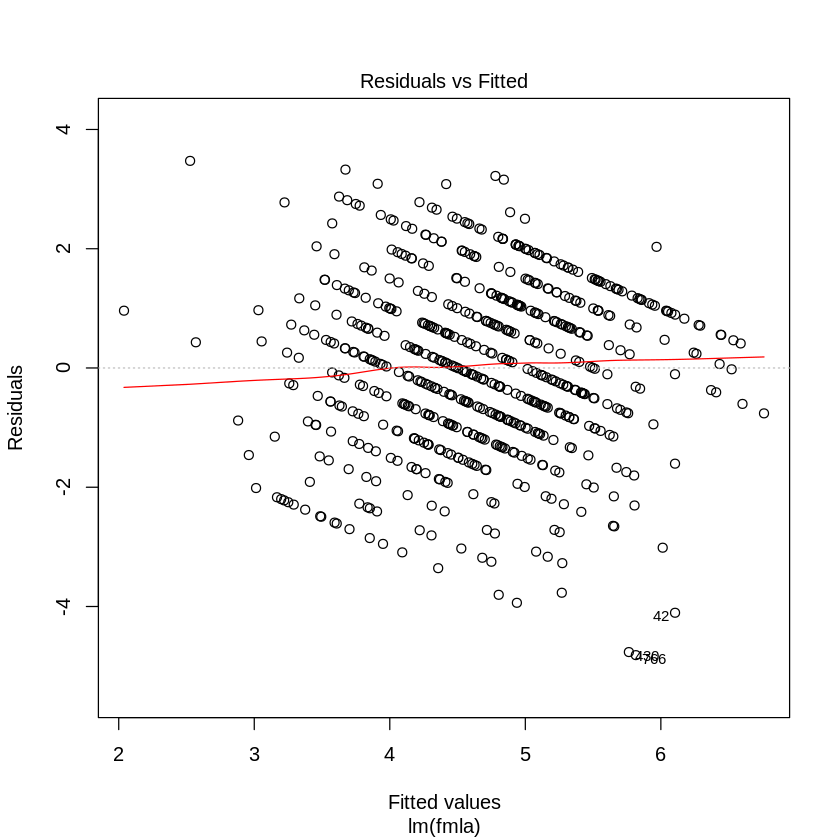

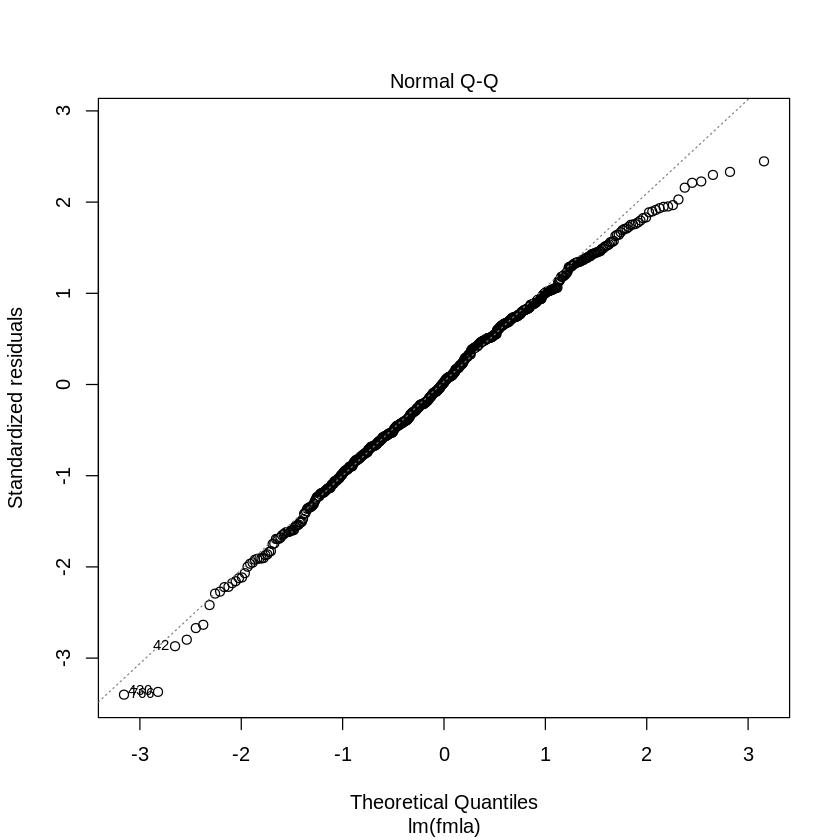

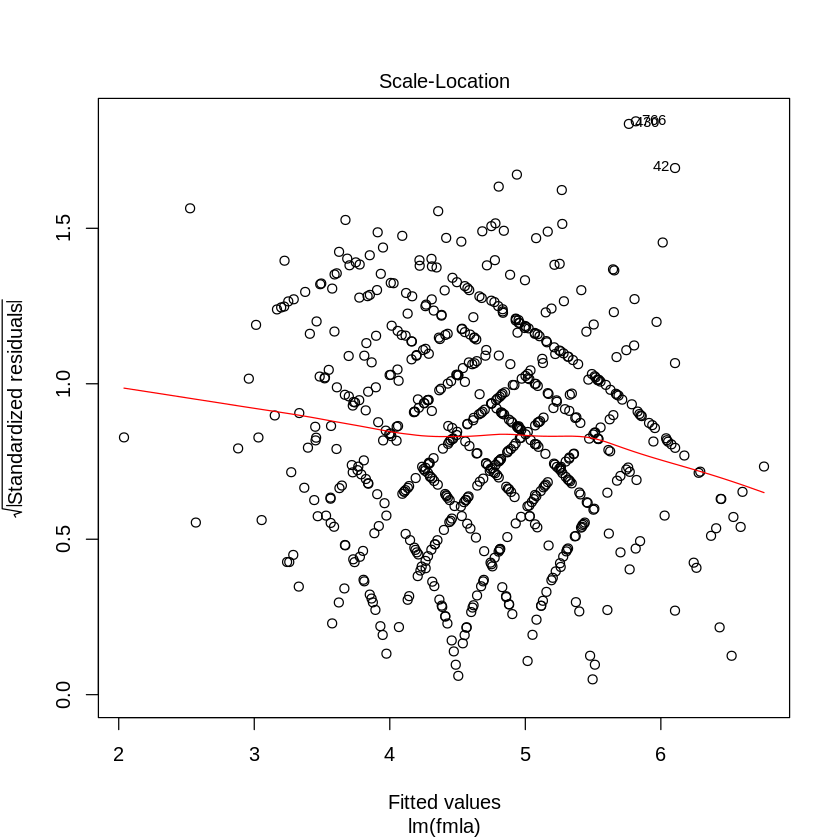

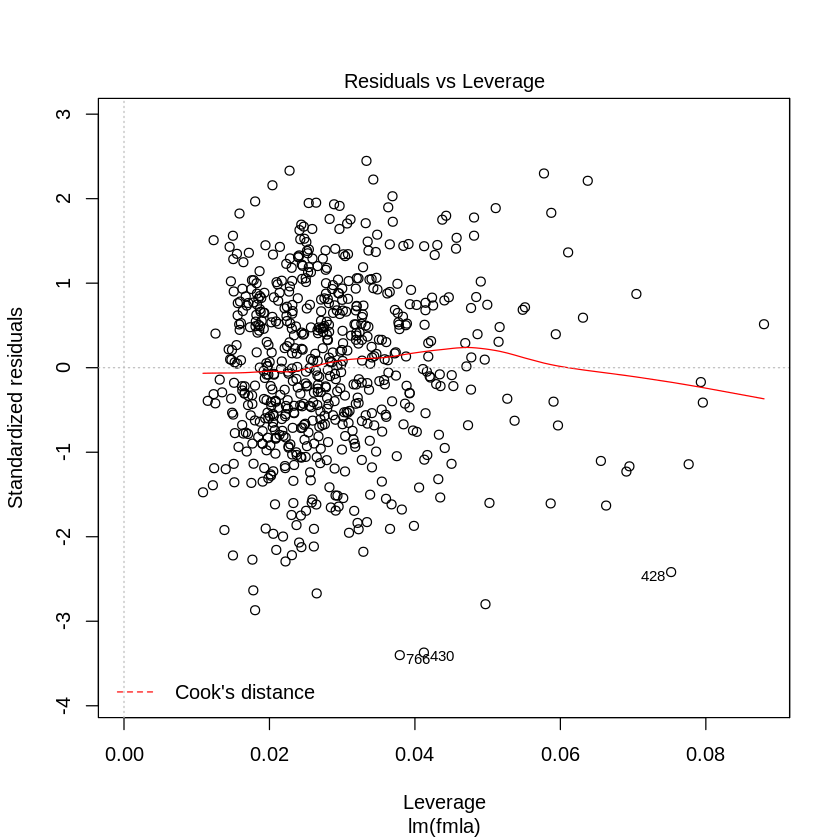

In [41]:
plot(mod)

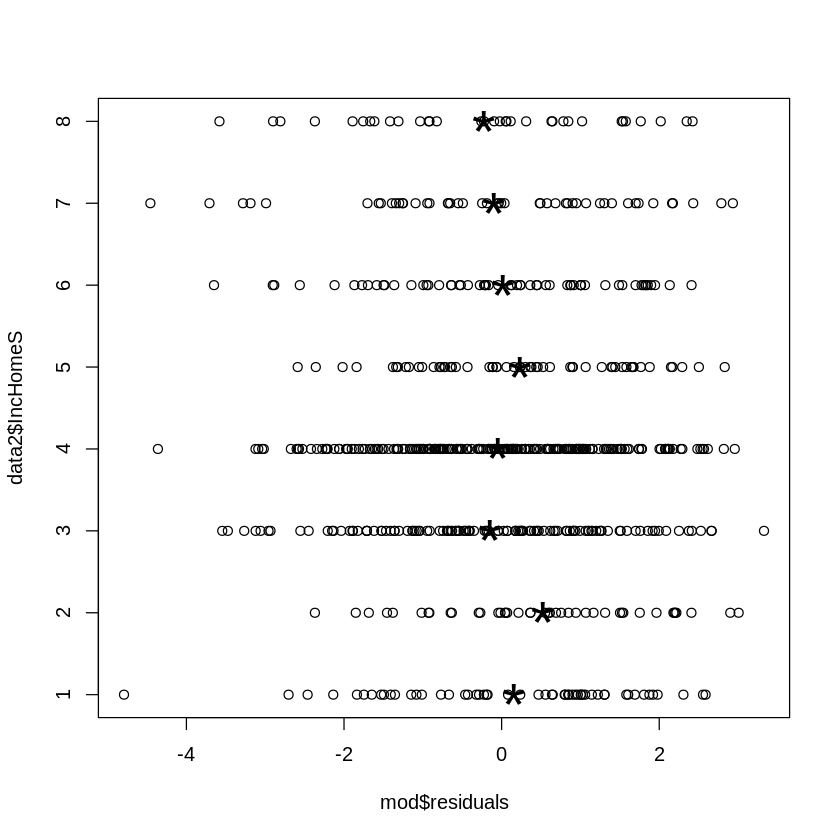

In [41]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [47]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [41]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

ERROR: Error in eval(expr, envir, enclos): object 'ComfNS3' not found


In [19]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [20]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + s(Age)

Parametric coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           4.1826     0.0906   46.17  < 2e-16 ***
I(ComfNS3 <= 3)TRUE  -0.7694     0.1666   -4.62  4.7e-06 ***
I(ComfNS3 == 7)TRUE   0.7656     0.1738    4.40  1.2e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
       edf Ref.df    F p-value    
s(Age)   1      1 13.3 0.00029 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0975   Deviance explained = 10.2%
GCV = 2.9649  Scale est. = 2.9465    n = 644

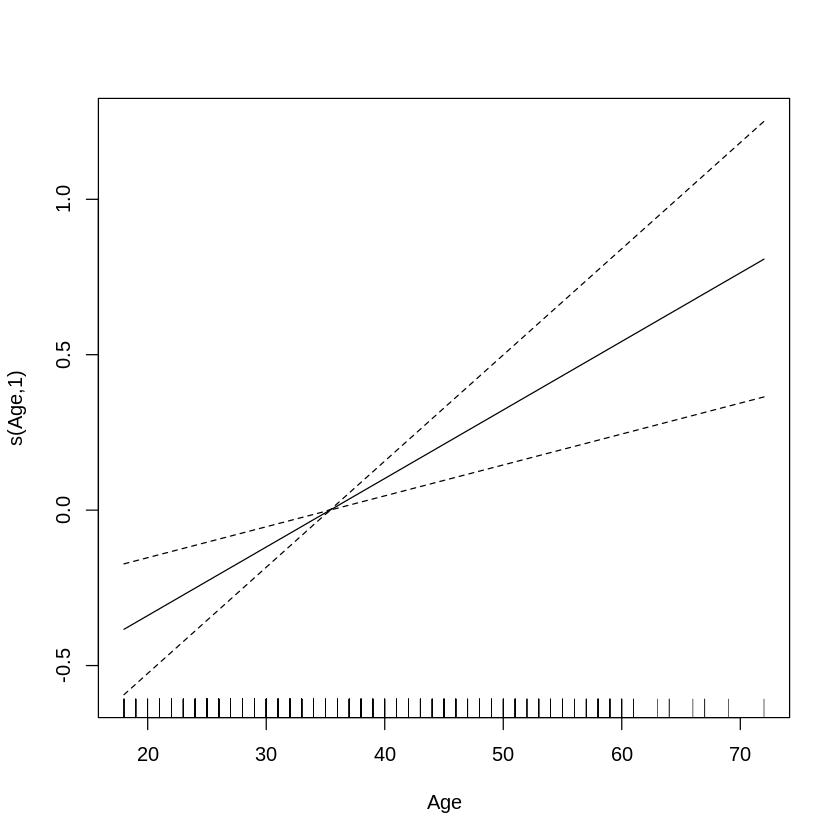

In [21]:
plot(mGam)

In [22]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ I(ComfNS3 <= 3) + I(ComfNS3 == 7) + Age + 
    HabitC2 + Political, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.234 -1.162 -0.081  1.001  4.540 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          4.19372    0.34065   12.31  < 2e-16 ***
I(ComfNS3 <= 3)TRUE -0.77483    0.16608   -4.67  3.8e-06 ***
I(ComfNS3 == 7)TRUE  0.75141    0.17314    4.34  1.7e-05 ***
Age                  0.02211    0.00602    3.67  0.00026 ***
HabitC2             -0.09516    0.03689   -2.58  0.01011 *  
Political           -0.05864    0.03039   -1.93  0.05408 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 638 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.109 
F-statistic: 16.7 on 5 and 638 DF,  p-value: 1.68e-15


In [23]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
I(ComfNS3 <= 3),1,115,115.2,39.6,5.8e-10
I(ComfNS3 == 7),1,59,59.2,20.3,7.7e-06
Age,1,39,39.1,13.4,2.7e-04
HabitC2,1,18,18.4,6.3,1.2e-02
Political,1,11,10.8,3.7,5.4e-02
Residuals,638,1857,2.9,NA,NA


In [24]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,1857,694
I(ComfNS3 <= 3),1,63,1920,713
I(ComfNS3 == 7),1,55,1911,711
Age,1,39,1896,705
HabitC2,1,19,1876,699
Political,1,11,1867,696


In [25]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



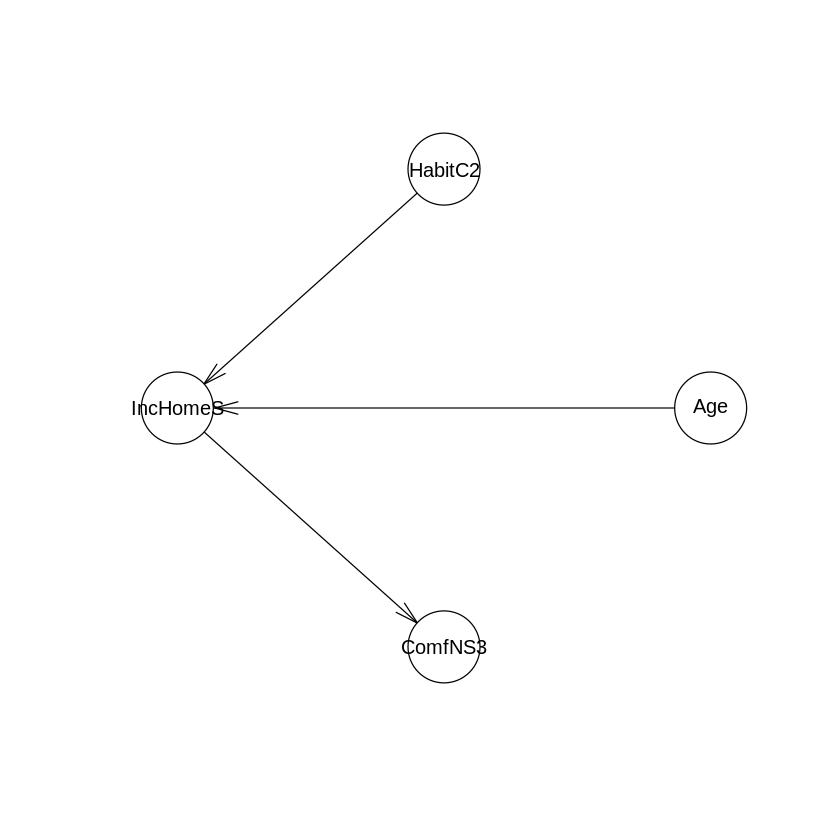

In [26]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

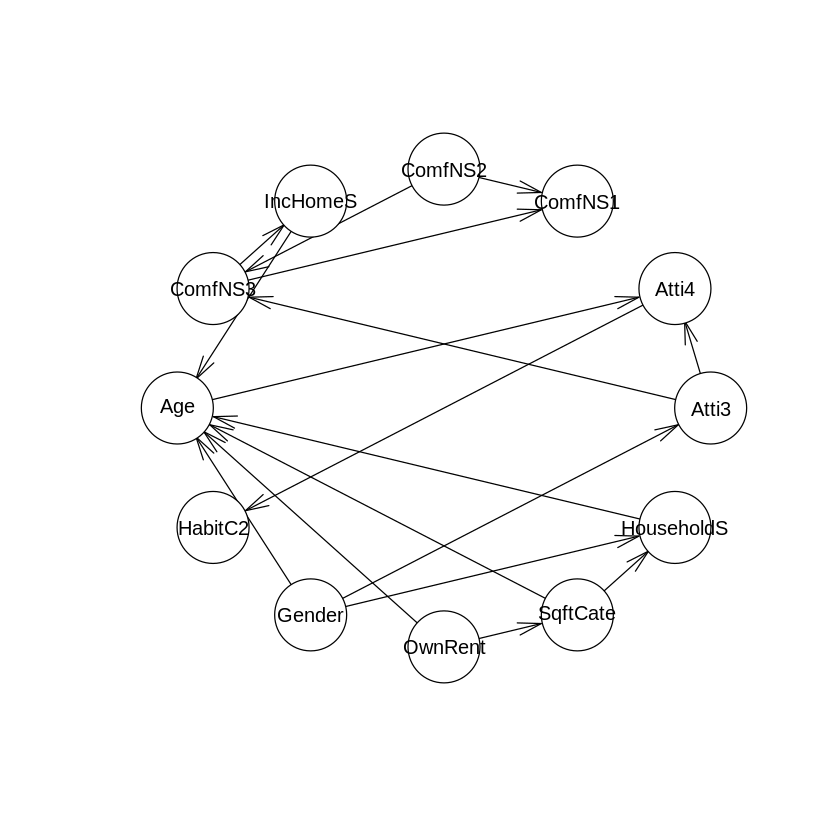

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)